In [1]:
#Competition: https://www.kaggle.com/c/digit-recognizer
#Score: 0.975

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import csv
from sklearn.model_selection import train_test_split



def load_data(path, initial_pos = 1):    
    df = pd.read_csv(path)
    df_set = []
    df_target = []
    
    for ind, row in df.iterrows():
        num = row.values
        df_set.append(num[initial_pos:].reshape(28,28))
        df_target.append(num[initial_pos-1])
    
    return df_set, df_target


X_train, y_train = load_data('/kaggle/input/digit-recognizer/train.csv', 1)
X_test, _ = load_data('/kaggle/input/digit-recognizer/test.csv', 0)


Using TensorFlow backend.


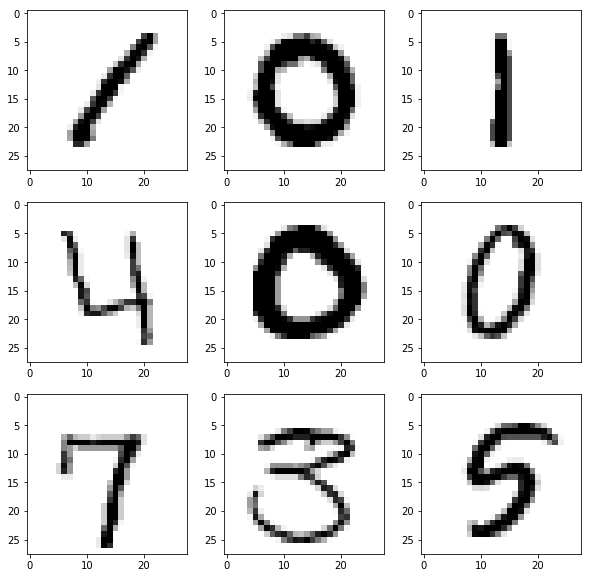

In [2]:
#plot the digits

n_rows = 3
n_cols = 3
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
counter = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax[row, col].imshow(X_train[counter], cmap='binary')
        counter += 1

In [3]:
#PREPROCESSING

#Reshape datasets
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))


#MISSING VALUES: None
print(np.isnan(X_train).any())
print(np.isnan(X_test).any())


#NORMALIZATION:
X_train = X_train / 255
X_test = X_test / 255


#FEATURE SELECTION: not applied in this context


#CLASSES CATEGORIZATION
y_train = to_categorical(y_train, len(np.unique(y_train)))



#Creation of a validation set to evaluate the obtained models
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15)



False
False


In [4]:
#CNN architecture


# Initialising the CNN
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False)


datagen.fit(X_train)


epochs = 30
batch_size = 64

classifier.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                         steps_per_epoch=len(X_train)/batch_size, 
                         epochs=epochs)


Epoch 1/30
558/557 [==============================] - 20s 35ms/step - loss: 1.3518 - accuracy: 0.5304
Epoch 2/30
558/557 [==============================] - 19s 34ms/step - loss: 0.7733 - accuracy: 0.7430
Epoch 3/30
558/557 [==============================] - 19s 34ms/step - loss: 0.6212 - accuracy: 0.7959
Epoch 4/30
558/557 [==============================] - 19s 34ms/step - loss: 0.5429 - accuracy: 0.8225
Epoch 5/30
558/557 [==============================] - 19s 35ms/step - loss: 0.4876 - accuracy: 0.8401
Epoch 6/30
558/557 [==============================] - 19s 34ms/step - loss: 0.4581 - accuracy: 0.8500
Epoch 7/30
558/557 [==============================] - 19s 35ms/step - loss: 0.4393 - accuracy: 0.8565
Epoch 8/30
558/557 [==============================] - 19s 34ms/step - loss: 0.4111 - accuracy: 0.8655
Epoch 9/30
558/557 [==============================] - 19s 34ms/step - loss: 0.4035 - accuracy: 0.8709
Epoch 10/30
558/557 [==============================] - 19s 34ms/step - loss: 0.385

In [5]:

#Evaluate the model using the validation dataset
val_loss, val_acc = classifier.evaluate(X_val, y_val, verbose=0)
print("Validation Loss: %.3f, Validation Accuracy: %.3f" % (val_loss, val_acc))


#Test the CNN and save the result
results = classifier.predict(X_test)


#export the results
with open('test_results.csv', 'w') as writeFile:
    
    writer = csv.writer(writeFile)
    writer.writerow(['ImageId', 'Label'])
    
    counter = 1
    for sample in results:
        num = np.argmax(sample)
        writer.writerow([counter, num])
        
        counter += 1

writeFile.close()


Validation Loss: 0.079, Validation Accuracy: 0.976
